###  Titanic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Importing datasets
TitanicTrain = pd.read_csv('./train.csv',sep=',')
TitanicTest = pd.read_csv('./test.csv',sep=',')

In [3]:
TitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TitanicTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Joining Test and Train to preprocess

TitanicComplete = pd.concat([TitanicTrain,TitanicTest],axis =0, sort=False, ignore_index=True)

In [6]:
TitanicComplete.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(TitanicComplete.shape, TitanicTrain.shape, TitanicTest.shape)

(1309, 12) (891, 12) (418, 11)


In [8]:
print('Checking for null values:\n{}'.format(TitanicComplete.isnull().any()))
print('\nChecking percentage of null values:\n{}'.format(TitanicComplete.isnull().sum()/len(TitanicComplete) * 100))

Checking for null values:
PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

Checking percentage of null values:
PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


#### Getting rid of null values by:
<p> 1. Dropping columns which have too many missing values (cabin) <br>
2. Replacing missing values with the average of the column in case of a few missing values (age)<br><br>
Dropping tickets column since it would convert to too many dummy variables and the target variable (survived)</p>

#### Setting test data rows' survived column to -1 for future referance

In [9]:
TitanicComplete = TitanicComplete.drop(['Cabin', 'Ticket'],axis=1)
TitanicComplete['Survived'] = TitanicComplete['Survived'].fillna(-1)
TitanicComplete = TitanicComplete.fillna(TitanicComplete.mean(axis=0))
TitanicComplete = TitanicComplete.dropna()

In [10]:
TitanicComplete.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
print('Checking for null values:\n{}'.format(TitanicComplete.isnull().any()))

Checking for null values:
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool


In [12]:
#Normalizing the quantitative variables - Age, Fare

TitanicComplete['Age']=(TitanicComplete['Age']-TitanicComplete['Age'].mean())/TitanicComplete['Age'].std()
TitanicComplete['Fare']=(TitanicComplete['Fare']-TitanicComplete['Fare'].mean())/TitanicComplete['Fare'].std()

In [13]:
TitanicComplete.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,-0.610429,1,0,-0.501950,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.633702,1,0,0.735500,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,-0.299396,0,0,-0.488906,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.400427,1,0,0.384106,S
4,5,0.0,3,"Allen, Mr. William Henry",male,0.400427,0,0,-0.486490,S


In [14]:
#Creating dummy variables
TitanicComplete = pd.get_dummies(TitanicComplete, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [15]:
TitanicComplete.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Parch_9', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
#Dropping one of each dummy variable to have a base
TitanicComplete = TitanicComplete.drop(['Pclass_1', 'Sex_female', 'SibSp_0', 'Parch_0', 'Embarked_C'],axis=1)

In [17]:
TitanicComplete.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Fare', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [18]:
#Dividing Full data back to train and test depending on if the 'Survived' column existed or not

flag1 = TitanicComplete.Survived >= 0
TitanicTrain = TitanicComplete[flag1]
flag2 = TitanicComplete.Survived < 0
TitanicTest = TitanicComplete[flag2]

In [19]:
print(TitanicTest.shape, TitanicTrain.shape, TitanicComplete.shape)

(418, 23) (889, 23) (1307, 23)


In [20]:
TitanicTest = TitanicTest.drop(['Survived'], axis = 1)

In [21]:
print(TitanicTest.shape, TitanicTrain.shape, TitanicComplete.shape)

(418, 22) (889, 23) (1307, 23)


In [22]:
#Setting 
features = ['Age', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = TitanicTrain.loc[:,features]
y = TitanicTrain.loc[:,target]

C:\Users\TVV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the model: 
 Train: 83.11897106109325 
 Test: 79.7752808988764 
MSE for training dataset = 0.16881028938906753
MSE for testing dataset = 0.20224719101123595
R2 for model = 0.797752808988764


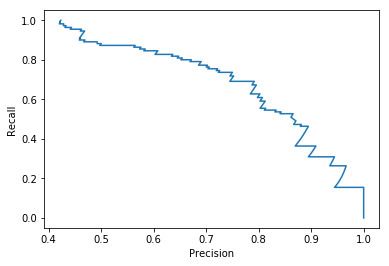

In [24]:
#Modeling the train dataset
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #Dividing the dataset into test and train with 70% and 30%
model.fit(X_train, y_train)

#Predicting the test and train datasets
y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)


#Finding the accuracy of the test and train datasets
TitanicTrainAccuracy = accuracy_score(y_train,y_train_hat, normalize = True) * 100 
TitanicTestAccuracy = accuracy_score(y_test,y_test_hat, normalize = True) * 100 

#Finding the precision, recall and threshold of the test dataset
TitanicPrecision, TitanicRecall, TitanicThresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

MSE_test = mean_squared_error(y_test,y_test_hat)
MSE_train = mean_squared_error(y_train,y_train_hat)

print ('The accuracy of the model: \n Train: {} \n Test: {} '.format(TitanicTrainAccuracy, TitanicTestAccuracy))
print("MSE for training dataset = {}".format(MSE_train))
print("MSE for testing dataset = {}".format(MSE_test))
print("R2 for model = {}".format(model.score(X_test, y_test)))
plt.plot(TitanicPrecision, TitanicRecall, label="precision recall curve for model")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show();

In [29]:
#Using KNeighbors Classifier to predict

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold


KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.8086816720257235


The accuracy of the model: 
 Train: 86.33440514469454 
 Test: 76.77902621722846 
MSE for training dataset = 0.13665594855305466
MSE for testing dataset = 0.23220973782771537
R2 for model = 0.797752808988764


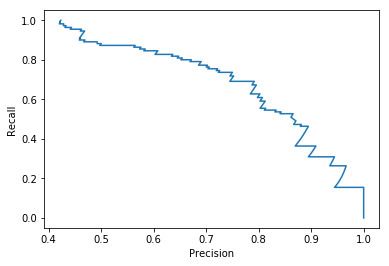

In [31]:
KNNmodel = KNeighborsClassifier(n_neighbors=4)
KNNmodel.fit(X_train, y_train)

y_test_hat = KNNmodel.predict(X_test)
y_train_hat = KNNmodel.predict(X_train)

#Finding the accuracy of the test and train datasets
TitanicTrainAccuracy = accuracy_score(y_train,y_train_hat, normalize = True) * 100 
TitanicTestAccuracy = accuracy_score(y_test,y_test_hat, normalize = True) * 100 

#Finding the precision, recall and threshold of the test dataset
TitanicPrecision, TitanicRecall, TitanicThresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

MSE_test = mean_squared_error(y_test,y_test_hat)
MSE_train = mean_squared_error(y_train,y_train_hat)

print ('The accuracy of the model: \n Train: {} \n Test: {} '.format(TitanicTrainAccuracy, TitanicTestAccuracy))
print("MSE for training dataset = {}".format(MSE_train))
print("MSE for testing dataset = {}".format(MSE_test))
print("R2 for model = {}".format(model.score(X_test, y_test)))
plt.plot(TitanicPrecision, TitanicRecall, label="precision recall curve for model")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show();